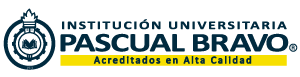

# **INFERENCIA ESTADÍSTICA**

Ingry Natalia Gómez Miranda

**Estadística inferencial vs. estadística descriptiva**

Mientras que la **estadística descriptiva** sirve para *entender las propiedades de un dataset* de observaciones, la **estadística inferencial** permite inferir propiedades más allá de ese dataset, es decir, de una población entera. Pero, ¿cómo es que se logra inferir propiedades de algo más allá del alcance de un conjunto de datos? Para que esto debemos tener bases sólidas de estadística descriptiva.

¿***Qué es una población y una muestra estadística***?

Supongamos, por ejemplo, que tenemos datos sobre la edad en la que los profesionales en administración financiera de Colombia consiguieron su primer empleo, tendríamos una muestra.

¿Sería correcto decir que el promedio de esa muestra es el promedio la población total de administradores de Colombia? No.

Y es aquí donde se hace útil la **estadística inferencial**. Vamos a inferir, a partir de una muestra, las características de una población total.


Entonces, las diferencias entre población y muestra son:


**Población** → Es el grupo total que quieres describir.

**Muestra** → Es una fracción representativa de la población.



Veamos un ejemplos para que quede más claro

A continuación realizaremos el inferencia estadística con el fin de probar si las diferentes variables continuas son iguales en los diferentes continentes.

#**1. Presentación de los datos**
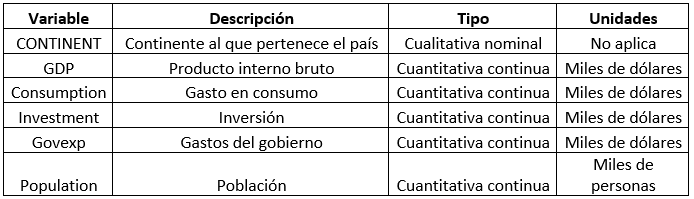

# **2. Cargar el conjunto de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargando archivo desde el directorio de trabajo
from google.colab import files
import pandas as pd

# Cargar un archivo desde tu dispositivo local
Archivo = files.upload()

# Obtener la ruta del archivo cargado
Ruta = list(Archivo.keys())[0]

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=';')

# Mostrar los 10 primeros registros del DataFrame
print()
datos.head(10)

Saving econom_countries.csv to econom_countries.csv



,NUM,COUNTRY,CONTINENT,GDP,Consumption,Investment,Govexp,Population
0,1,ALGERIA,AFRICA,69433331,3.457780e+07,1.249800e+07,1.555307e+07,25003
1,2,BENIN,AFRICA,4360800,3.279322e+06,3.139776e+05,8.241912e+05,4740
2,3,BURKINA FASO,AFRICA,4607176,3.469204e+06,4.468961e+05,1.045829e+06,9016
3,4,BURUNDI,AFRICA,3020600,2.422521e+06,2.054008e+05,5.316256e+05,5492
4,5,CAMEROON,AFRICA,14128424,7.869532e+06,1.003118e+06,3.433207e+06,11524
5,6,CAPE VERDE IS.,AFRICA,392518,3.085191e+05,7.575597e+04,5.377497e+04,371
6,7,CENTRAL AFR.R.,AFRICA,1741632,1.536119e+06,7.663181e+04,2.455701e+05,3008
7,8,CHAD,AFRICA,2266320,1.586424e+06,3.626112e+04,7.660162e+05,5680
8,9,COMOROS,AFRICA,267900,1.886016e+05,3.027270e+04,8.063790e+04,475
9,10,CONGO,AFRICA,5032236,2.299732e+06,1.962572e+05,1.811605e+06,2276


In [3]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# StandardScaler(): Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import statsmodels.api as sm

In [4]:
#Revisando estructura de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUM          116 non-null    int64  
 1   COUNTRY      116 non-null    object 
 2   CONTINENT    116 non-null    object 
 3   GDP          116 non-null    int64  
 4   Consumption  116 non-null    float64
 5   Investment   116 non-null    float64
 6   Govexp       116 non-null    float64
 7   Population   116 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 7.4+ KB


# **3. Una breve descripción de los datos**

In [5]:
#El resumen estadístico de nuestro dataset total.
datos.describe()

,NUM,GDP,Consumption,Investment,Govexp,Population
count,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,58.500000,1.655568e+08,1.045242e+08,3.747349e+07,2.413470e+07,3.897512e+04
std,33.630343,4.936769e+08,3.217497e+08,1.156573e+08,6.905220e+07,1.335379e+05
min,1.000000,2.014800e+05,1.164554e+05,3.027270e+04,3.303355e+04,4.000000e+01
25%,29.750000,4.963363e+06,3.213227e+06,3.964568e+05,1.014843e+06,3.232000e+03
50%,58.500000,2.078589e+07,1.562357e+07,2.553911e+06,3.767007e+06,8.483500e+03
75%,87.250000,1.089873e+08,7.400426e+07,1.805847e+07,1.667743e+07,2.437075e+04
max,116.000000,4.520216e+09,3.060186e+09,9.176039e+08,5.921483e+08,1.133683e+06


In [6]:
# Para ver cada columna independientemente:
datos.GDP.describe()

,GDP
count,1.160000e+02
mean,1.655568e+08
std,4.936769e+08
min,2.014800e+05
25%,4.963363e+06
50%,2.078589e+07
75%,1.089873e+08
max,4.520216e+09


<Axes: xlabel='GDP', ylabel='CONTINENT'>

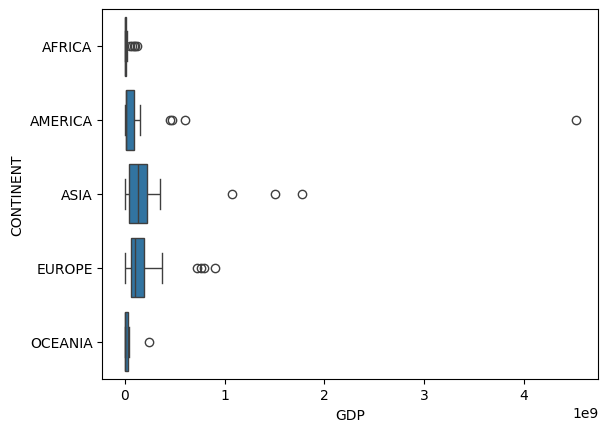

In [7]:
# box plot Diagrama de caja y bigotes por continente
sns.boxplot(x = 'GDP', y = 'CONTINENT', data = datos)

# **4. Inferencia estadística: intervalos de confianza**
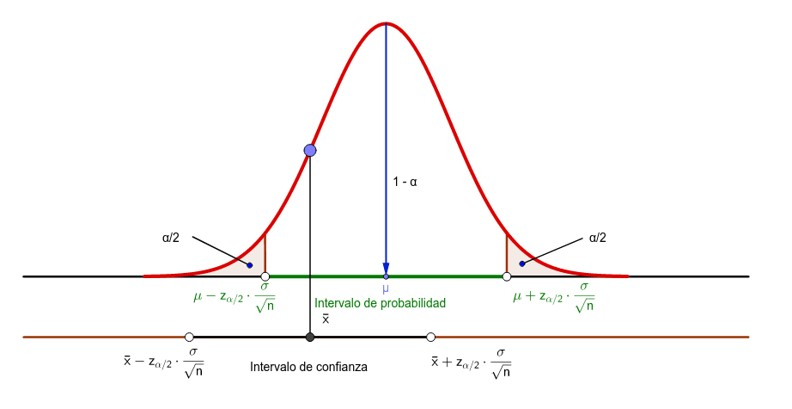

In [8]:
#Dividir los datos por continente
GDP_AMERICA = datos.query('CONTINENT == "AMERICA"')['GDP']
GDP_AFRICA = datos.query('CONTINENT == "AFRICA"')['GDP']
GDP_ASIA= datos.query('CONTINENT == "ASIA"')['GDP']
GDP_EUROPA = datos.query('CONTINENT == "EUROPE"')['GDP']
GDP_OCEANIA = datos.query('CONTINENT == "OCEANIA"')['GDP']

GDP_AMERICA.head(10)



,GDP
39,651232
40,455462306
41,10476006
42,15322284
43,9433728
44,262171
45,19562019
46,7029585
47,5996020
48,476205748


In [9]:
GDP_AMERICA.describe()

,GDP
count,2.600000e+01
mean,2.572949e+08
std,8.846306e+08
min,2.014800e+05
25%,6.994784e+06
50%,1.306488e+07
75%,9.422862e+07
max,4.520216e+09


In [10]:
len(GDP_AMERICA)

26

In [11]:
#Cálculo del intervalo de confianza al 95%
confidence_level = 0.95  # Nivel de confianza del 95%
media_GDP_AMERICA =GDP_AMERICA.mean()
media_GDP_EUROPA =GDP_EUROPA.mean()
varianza_GDP_AMERICA =GDP_AMERICA.var()
varianza_GDP_EUROPA =GDP_EUROPA.var()
# Calcular la diferencia de medias
mean_diff = media_GDP_AMERICA - media_GDP_EUROPA

# Calcular el error estándar de la diferencia
std_err_diff = np.sqrt(varianza_GDP_AMERICA/len(GDP_AMERICA) + varianza_GDP_EUROPA/len(GDP_EUROPA))

# Calcular el intervalo de confianza utilizando la distribución t de Student
n1 = len(GDP_AMERICA)
n2 = len(GDP_EUROPA)
df = n1 + n2 - 2  # Grados de libertad
t_critical = st.t.ppf((1 + confidence_level) / 2, df=df)  # Valor crítico de t

lower_bound = mean_diff - t_critical * std_err_diff
upper_bound = mean_diff + t_critical * std_err_diff

print(f"Intervalo de confianza del {confidence_level*100}% para la diferencia de medias:", (lower_bound, upper_bound))

Intervalo de confianza del 95.0% para la diferencia de medias: (-317954719.40352565, 412953533.83737177)


Como el intervalo de confianza incluye el cero, se puede concluir que el promedio del producto interno bruto (GDP) de América es igual al de Eurpoa

# **5. Inferencia estadística: pruebas de hipótesis**

**Planteamos las hipótesis**

 $$ H_{0}:\mu_{GDP_{AMERICA}}=\mu_{GDP_{EUROPA}}$$
 $$ H_{1}:\mu_{GDP_{AMERICA}}\neq\mu_{GDP_{EUROPA}}$$

In [12]:
alpha = 0.05  # Nivel de significancia
t_stat, p_valor = st.ttest_ind(GDP_AMERICA, GDP_EUROPA)
t_statistic, p_value = st.ttest_ind(GDP_AMERICA, GDP_EUROPA)
print(f"Estadístico de prueba t: {t_statistic}")
print(f"Valor p: {p_value}")

# Comparar el valor p con el nivel de significancia para tomar una decisión
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para decir que hay una diferencia significativa.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para decir que hay una diferencia significativa.")

Estadístico de prueba t: 0.2569089684737709
Valor p: 0.7983247614917099
No podemos rechazar la hipótesis nula: no hay suficiente evidencia para decir que hay una diferencia significativa.
